<a href="https://colab.research.google.com/github/drmonares/difva/blob/main/predecir_difva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
url ='https://raw.githubusercontent.com/drmonares/difva/main/VenoArt.csv'
df = pd.read_csv(url)

In [ ]:
difva = df['difva']
SvcO2 = df['SvcO2']

In [ ]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(SvcO2, difva,  epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


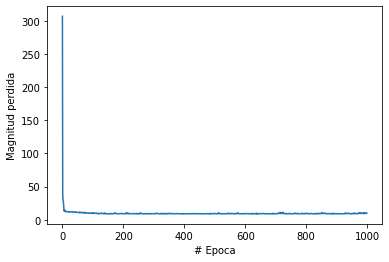

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud perdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Predecir difva!")
resultado = modelo.predict([55])
print("difva: " + str(resultado))

Predecir difva!
difva: [[6.6007776]]


In [ ]:
#Exportar modelo en formato h5
modelo.save('predecir_difva.h5')

In [ ]:
!ls

predecir_difva.h5  sample_data


In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.2 MB/s 
     |████████████████████████████████| 462 kB 10.8 MB/s 


In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras predecir_difva.h5 carpeta_salida

In [ ]:
!ls carpeta_salida

group1-shard1of1.bin  model.json
